# <font color=red>Regression - Ev Fiyatları Tahmini

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
import warnings
warnings.filterwarnings('ignore')  #altta kırmızı uyarıları kaldırmak için


In [3]:
df=pd.read_csv("kc_house_data.csv")

# EDA - Explarotary Data Analysis

In [4]:
df.head() #ilk 5 satır

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


In [5]:
df.tail() # son 5 satır

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
21608,263000018,20140521T000000,360000.0,3,2.50,1530,1131,3.0,0,0,...,8,1530,0,2009,0,98103,47.6993,-122.346,1530,1509
21609,6600060120,20150223T000000,400000.0,4,2.50,2310,5813,2.0,0,0,...,8,2310,0,2014,0,98146,47.5107,-122.362,1830,7200
21610,1523300141,20140623T000000,402101.0,2,0.75,1020,1350,2.0,0,0,...,7,1020,0,2009,0,98144,47.5944,-122.299,1020,2007
21611,291310100,20150116T000000,400000.0,3,2.50,1600,2388,2.0,0,0,...,8,1600,0,2004,0,98027,47.5345,-122.069,1410,1287
21612,1523300157,20141015T000000,325000.0,2,0.75,1020,1076,2.0,0,0,...,7,1020,0,2008,0,98144,47.5941,-122.299,1020,1357


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21613 non-null  int64  
 1   date           21613 non-null  object 
 2   price          21613 non-null  float64
 3   bedrooms       21613 non-null  int64  
 4   bathrooms      21613 non-null  float64
 5   sqft_living    21613 non-null  int64  
 6   sqft_lot       21613 non-null  int64  
 7   floors         21613 non-null  float64
 8   waterfront     21613 non-null  int64  
 9   view           21613 non-null  int64  
 10  condition      21613 non-null  int64  
 11  grade          21613 non-null  int64  
 12  sqft_above     21613 non-null  int64  
 13  sqft_basement  21613 non-null  int64  
 14  yr_built       21613 non-null  int64  
 15  yr_renovated   21613 non-null  int64  
 16  zipcode        21613 non-null  int64  
 17  lat            21613 non-null  float64
 18  long  

In [7]:
df.describe()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,2.161300e+04,2.161300e+04,21613.000000,21613.000000,21613.000000,2.161300e+04,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000
mean,4.580302e+09,5.400881e+05,3.370842,2.114757,2079.899736,1.510697e+04,1.494309,0.007542,0.234303,3.409430,7.656873,1788.390691,291.509045,1971.005136,84.402258,98077.939805,47.560053,-122.213896,1986.552492,12768.455652
std,2.876566e+09,3.671272e+05,0.930062,0.770163,918.440897,4.142051e+04,0.539989,0.086517,0.766318,0.650743,1.175459,828.090978,442.575043,29.373411,401.679240,53.505026,0.138564,0.140828,685.391304,27304.179631
min,1.000102e+06,7.500000e+04,0.000000,0.000000,290.000000,5.200000e+02,1.000000,0.000000,0.000000,1.000000,1.000000,290.000000,0.000000,1900.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000
25%,2.123049e+09,3.219500e+05,3.000000,1.750000,1427.000000,5.040000e+03,1.000000,0.000000,0.000000,3.000000,7.000000,1190.000000,0.000000,1951.000000,0.000000,98033.000000,47.471000,-122.328000,1490.000000,5100.000000
50%,3.904930e+09,4.500000e+05,3.000000,2.250000,1910.000000,7.618000e+03,1.500000,0.000000,0.000000,3.000000,7.000000,1560.000000,0.000000,1975.000000,0.000000,98065.000000,47.571800,-122.230000,1840.000000,7620.000000
75%,7.308900e+09,6.450000e+05,4.000000,2.500000,2550.000000,1.068800e+04,2.000000,0.000000,0.000000,4.000000,8.000000,2210.000000,560.000000,1997.000000,0.000000,98118.000000,47.678000,-122.125000,2360.000000,10083.000000
max,9.900000e+09,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,1.000000,4.000000,5.000000,13.000000,9410.000000,4820.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,6210.000000,871200.000000


In [8]:
df.corr() # 0.90 ın üstü ve 0.20 nin altının değerlerini almıyoruz 

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
id,1.000000,-0.016762,0.001286,0.005160,-0.012258,-0.132109,0.018525,-0.002721,0.011592,-0.023783,0.008130,-0.010842,-0.005151,0.021380,-0.016907,-0.008224,-0.001891,0.020799,-0.002901,-0.138798
price,-0.016762,1.000000,0.308350,0.525138,0.702035,0.089661,0.256794,0.266369,0.397293,0.036362,0.667434,0.605567,0.323816,0.054012,0.126434,-0.053203,0.307003,0.021626,0.585379,0.082447
bedrooms,0.001286,0.308350,1.000000,0.515884,0.576671,0.031703,0.175429,-0.006582,0.079532,0.028472,0.356967,0.477600,0.303093,0.154178,0.018841,-0.152668,-0.008931,0.129473,0.391638,0.029244
bathrooms,0.005160,0.525138,0.515884,1.000000,0.754665,0.087740,0.500653,0.063744,0.187737,-0.124982,0.664983,0.685342,0.283770,0.506019,0.050739,-0.203866,0.024573,0.223042,0.568634,0.087175
sqft_living,-0.012258,0.702035,0.576671,0.754665,1.000000,0.172826,0.353949,0.103818,0.284611,-0.058753,0.762704,0.876597,0.435043,0.318049,0.055363,-0.199430,0.052529,0.240223,0.756420,0.183286
sqft_lot,-0.132109,0.089661,0.031703,0.087740,0.172826,1.000000,-0.005201,0.021604,0.074710,-0.008958,0.113621,0.183512,0.015286,0.053080,0.007644,-0.129574,-0.085683,0.229521,0.144608,0.718557
floors,0.018525,0.256794,0.175429,0.500653,0.353949,-0.005201,1.000000,0.023698,0.029444,-0.263768,0.458183,0.523885,-0.245705,0.489319,0.006338,-0.059121,0.049614,0.125419,0.279885,-0.011269
waterfront,-0.002721,0.266369,-0.006582,0.063744,0.103818,0.021604,0.023698,1.000000,0.401857,0.016653,0.082775,0.072075,0.080588,-0.026161,0.092885,0.030285,-0.014274,-0.041910,0.086463,0.030703
view,0.011592,0.397293,0.079532,0.187737,0.284611,0.074710,0.029444,0.401857,1.000000,0.045990,0.251321,0.167649,0.276947,-0.053440,0.103917,0.084827,0.006157,-0.078400,0.280439,0.072575
condition,-0.023783,0.036362,0.028472,-0.124982,-0.058753,-0.008958,-0.263768,0.016653,0.045990,1.000000,-0.144674,-0.158214,0.174105,-0.361417,-0.060618,0.003026,-0.014941,-0.106500,-0.092824,-0.003406


In [9]:
df.shape

(21613, 21)

In [10]:
import seaborn as sns

In [11]:
df["bedrooms"].value_counts()

3     9824
4     6882
2     2760
5     1601
6      272
1      199
7       38
0       13
8       13
9        6
10       3
11       1
33       1
Name: bedrooms, dtype: int64

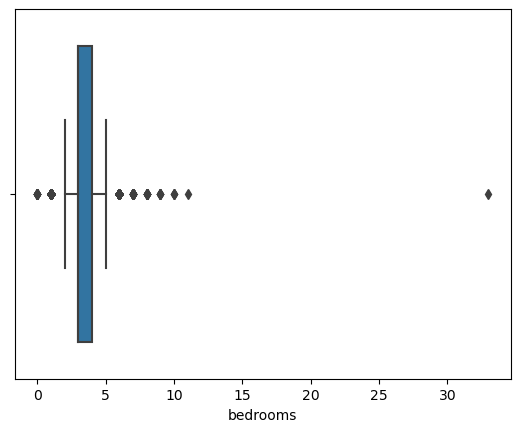

In [12]:
sns.boxplot(x=df["bedrooms"]); #outlier gösterir

In [13]:
df["bathrooms"].value_counts()

2.50    5380
1.00    3852
1.75    3048
2.25    2047
2.00    1930
1.50    1446
2.75    1185
3.00     753
3.50     731
3.25     589
3.75     155
4.00     136
4.50     100
4.25      79
0.75      72
4.75      23
5.00      21
5.25      13
0.00      10
5.50      10
1.25       9
6.00       6
0.50       4
5.75       4
6.75       2
8.00       2
6.25       2
6.50       2
7.50       1
7.75       1
Name: bathrooms, dtype: int64

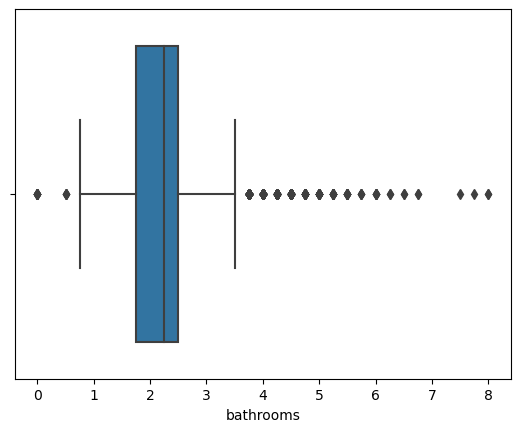

In [14]:
sns.boxplot(x=df["bathrooms"]);

In [15]:
outliers = df.quantile(.97)
df = df[(df['price']<outliers['price'])]
df = df[(df['bedrooms']<outliers['bedrooms'])]
df = df[(df['sqft_living']<outliers['sqft_living'])]

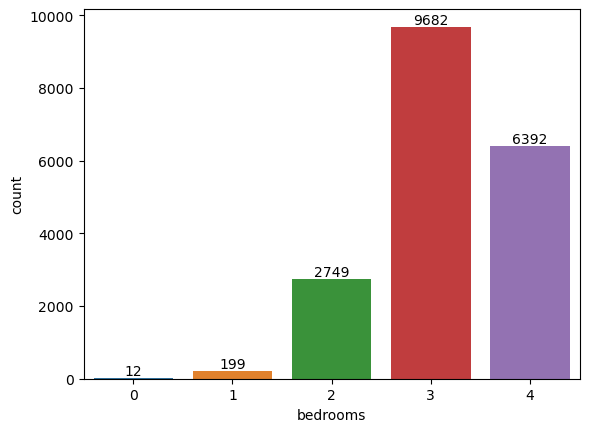

In [16]:
ax=sns.countplot(x=df["bedrooms"]);
ax.bar_label(ax.containers[0]);

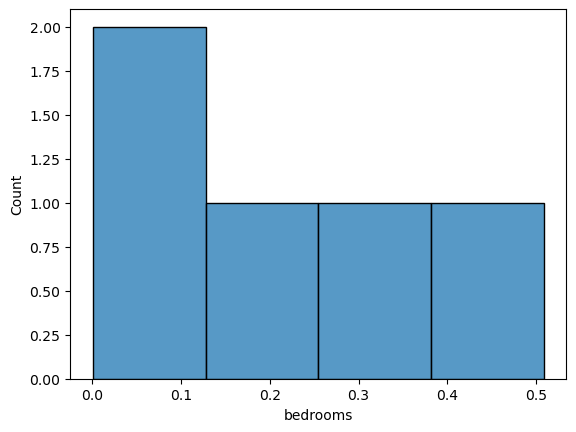

In [17]:
sns.histplot(df["bedrooms"].value_counts(normalize=True)); #yüzde değeri grafik

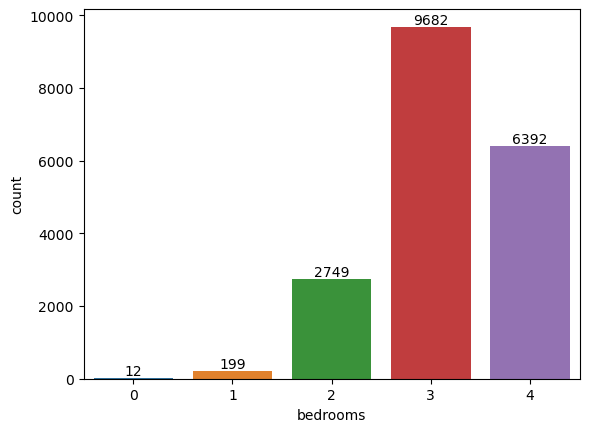

In [18]:
ax=sns.countplot(x=df["bedrooms"])
ax.bar_label(ax.containers[0]); # kutucukların üstüne değerleri yazdırır

In [19]:
df=df[df["bedrooms"]<11]

In [20]:
df=df[df["bathrooms"]<7]

In [21]:
df['bedrooms']=df['bedrooms']**2 #yatak ve banyo daha çok oranda fiyyatı değiştirdiği için karesini alıyoruz 
df['bathrooms']=df['bathrooms']**2

In [22]:
import numpy as np
df['basement']= np.where(df['sqft_basement']>0, 1, 0)
df['renovated']= np.where(df['yr_renovated']>0, 1, 0)

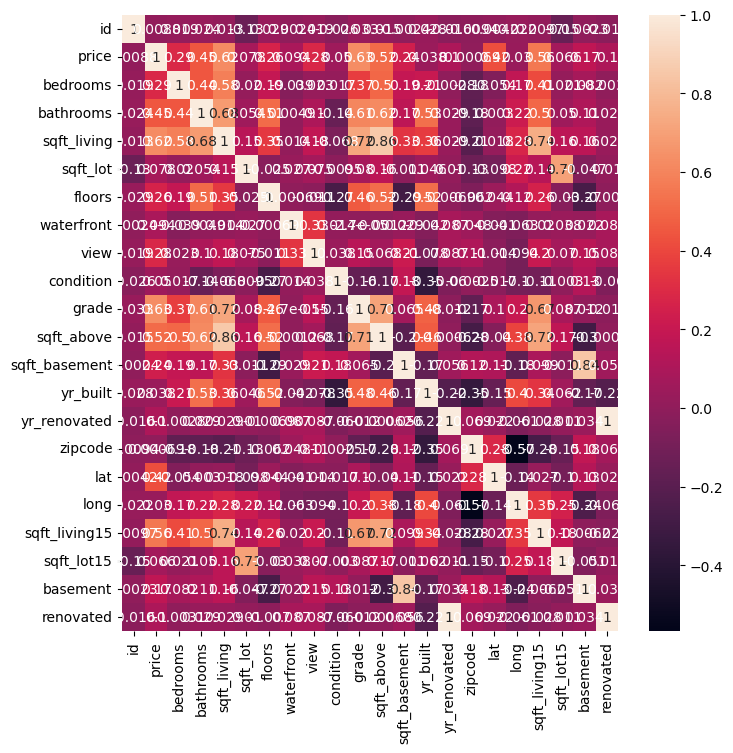

In [23]:
plt.figure(figsize=(8,8))
sns.heatmap(df.corr(),annot=True);

In [24]:
abs(df.corr()['price'].sort_values(ascending=False)) #büüktten küçüğe doğr sıralar

price            1.000000
grade            0.631395
sqft_living      0.621299
sqft_living15    0.558097
sqft_above       0.515178
bathrooms        0.446376
lat              0.419780
bedrooms         0.285343
view             0.282466
floors           0.261281
sqft_basement    0.237770
basement         0.169424
yr_renovated     0.104369
renovated        0.103979
waterfront       0.094150
sqft_lot         0.077537
sqft_lot15       0.066261
condition        0.050244
yr_built         0.038450
long             0.029887
id               0.008781
zipcode          0.000686
Name: price, dtype: float64

# Feature Engineering

In [25]:
df.isnull().sum() 

id               0
date             0
price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
grade            0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
zipcode          0
lat              0
long             0
sqft_living15    0
sqft_lot15       0
basement         0
renovated        0
dtype: int64

In [26]:
df["zipcode"]=df["zipcode"].astype("object")

In [27]:
df["age"]=2022-df["yr_built"]

In [28]:
#boş veri yok 

### Modelling 

In [29]:
from sklearn.model_selection import train_test_split #random sayı
#Seed (rakamları seçtiğimizde daha sonra programı çalıştırınca rakamlar değişmiyor ve başarı oranı korunuyor.Random State 42 yi bunuun için yazdık )

In [30]:
from sklearn.linear_model import LinearRegression 

In [31]:
lr=LinearRegression()

In [32]:
from sklearn.metrics import r2_score, mean_squared_error  # r2 basarı oranı 85 ten ukarı cıkarsa başasrılı

In [33]:
x=df[["sqft_living","grade","sqft_above","bathrooms","view","basement","bedrooms","lat","waterfront","floors","zipcode","age","renovated","condition","sqft_living15","lat","yr_renovated","renovated","waterfront","sqft_lot","sqft_lot15","condition","yr_built","long","id"]]
y=df[["price"]]

In [34]:
x.head()

,sqft_living,grade,sqft_above,bathrooms,view,basement,bedrooms,lat,waterfront,floors,...,lat,yr_renovated,renovated,waterfront,sqft_lot,sqft_lot15,condition,yr_built,long,id
0,1180,7,1180,1.0000,0,0,9,47.5112,0,1.0,...,47.5112,0,0,0,5650,5650,3,1955,-122.257,7129300520
1,2570,7,2170,5.0625,0,1,9,47.7210,0,2.0,...,47.7210,1991,1,0,7242,7639,3,1951,-122.319,6414100192
2,770,6,770,1.0000,0,0,4,47.7379,0,1.0,...,47.7379,0,0,0,10000,8062,3,1933,-122.233,5631500400
3,1960,7,1050,9.0000,0,1,16,47.5208,0,1.0,...,47.5208,0,0,0,5000,5000,5,1965,-122.393,2487200875
4,1680,8,1680,4.0000,0,0,9,47.6168,0,1.0,...,47.6168,0,0,0,8080,7503,3,1987,-122.045,1954400510


In [35]:
y= df[['price']]

In [36]:
y.shape

(19034, 1)

In [37]:
y.head()

,price
0,221900.0
1,538000.0
2,180000.0
3,604000.0
4,510000.0


In [38]:
x

,sqft_living,grade,sqft_above,bathrooms,view,basement,bedrooms,lat,waterfront,floors,...,lat,yr_renovated,renovated,waterfront,sqft_lot,sqft_lot15,condition,yr_built,long,id
0,1180,7,1180,1.0000,0,0,9,47.5112,0,1.0,...,47.5112,0,0,0,5650,5650,3,1955,-122.257,7129300520
1,2570,7,2170,5.0625,0,1,9,47.7210,0,2.0,...,47.7210,1991,1,0,7242,7639,3,1951,-122.319,6414100192
2,770,6,770,1.0000,0,0,4,47.7379,0,1.0,...,47.7379,0,0,0,10000,8062,3,1933,-122.233,5631500400
3,1960,7,1050,9.0000,0,1,16,47.5208,0,1.0,...,47.5208,0,0,0,5000,5000,5,1965,-122.393,2487200875
4,1680,8,1680,4.0000,0,0,9,47.6168,0,1.0,...,47.6168,0,0,0,8080,7503,3,1987,-122.045,1954400510
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21608,1530,8,1530,6.2500,0,0,9,47.6993,0,3.0,...,47.6993,0,0,0,1131,1509,3,2009,-122.346,263000018
21609,2310,8,2310,6.2500,0,0,16,47.5107,0,2.0,...,47.5107,0,0,0,5813,7200,3,2014,-122.362,6600060120
21610,1020,7,1020,0.5625,0,0,4,47.5944,0,2.0,...,47.5944,0,0,0,1350,2007,3,2009,-122.299,1523300141
21611,1600,8,1600,6.2500,0,0,9,47.5345,0,2.0,...,47.5345,0,0,0,2388,1287,3,2004,-122.069,291310100


In [39]:
x=pd.get_dummies(x,drop_first=True)    # 0 1 olayı 

In [40]:
x

,sqft_living,grade,sqft_above,bathrooms,view,basement,bedrooms,lat,waterfront,floors,...,zipcode_98146,zipcode_98148,zipcode_98155,zipcode_98166,zipcode_98168,zipcode_98177,zipcode_98178,zipcode_98188,zipcode_98198,zipcode_98199
0,1180,7,1180,1.0000,0,0,9,47.5112,0,1.0,...,0,0,0,0,0,0,1,0,0,0
1,2570,7,2170,5.0625,0,1,9,47.7210,0,2.0,...,0,0,0,0,0,0,0,0,0,0
2,770,6,770,1.0000,0,0,4,47.7379,0,1.0,...,0,0,0,0,0,0,0,0,0,0
3,1960,7,1050,9.0000,0,1,16,47.5208,0,1.0,...,0,0,0,0,0,0,0,0,0,0
4,1680,8,1680,4.0000,0,0,9,47.6168,0,1.0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21608,1530,8,1530,6.2500,0,0,9,47.6993,0,3.0,...,0,0,0,0,0,0,0,0,0,0
21609,2310,8,2310,6.2500,0,0,16,47.5107,0,2.0,...,1,0,0,0,0,0,0,0,0,0
21610,1020,7,1020,0.5625,0,0,4,47.5944,0,2.0,...,0,0,0,0,0,0,0,0,0,0
21611,1600,8,1600,6.2500,0,0,9,47.5345,0,2.0,...,0,0,0,0,0,0,0,0,0,0


In [41]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.20,random_state=42)

In [42]:
x_train.shape,x_test.shape,y_train.shape,y_test.shape

((15227, 93), (3807, 93), (15227, 1), (3807, 1))

In [43]:
x.head()

,sqft_living,grade,sqft_above,bathrooms,view,basement,bedrooms,lat,waterfront,floors,...,zipcode_98146,zipcode_98148,zipcode_98155,zipcode_98166,zipcode_98168,zipcode_98177,zipcode_98178,zipcode_98188,zipcode_98198,zipcode_98199
0,1180,7,1180,1.0000,0,0,9,47.5112,0,1.0,...,0,0,0,0,0,0,1,0,0,0
1,2570,7,2170,5.0625,0,1,9,47.7210,0,2.0,...,0,0,0,0,0,0,0,0,0,0
2,770,6,770,1.0000,0,0,4,47.7379,0,1.0,...,0,0,0,0,0,0,0,0,0,0
3,1960,7,1050,9.0000,0,1,16,47.5208,0,1.0,...,0,0,0,0,0,0,0,0,0,0
4,1680,8,1680,4.0000,0,0,9,47.6168,0,1.0,...,0,0,0,0,0,0,0,0,0,0


In [44]:
lr = LinearRegression()
regmodel = lr.fit(x_train,y_train) #model verinin hher birimini ziyaret edip öğreniyor

In [45]:
y_pretest = regmodel.predict(x_test) # test verisinde araba fiyatlarını tahmin ettik

In [46]:
(mean_squared_error(y_test,y_pretest))**0.5

93613.62548908815

In [47]:
r2_score(y_test,y_pretest)

0.8288065930816646

In [48]:
model=lr.fit(x_train,y_train)

In [49]:
tahmin=model.predict(x_test)

In [50]:
(mean_squared_error(tahmin,y_test))**0.5

93613.62548908815

In [51]:
r2_score(tahmin,y_test)

0.7921837122228471

In [52]:
from sklearn.linear_model import Ridge, Lasso

In [53]:
R=Ridge()
L=Lasso()

In [54]:
R.fit(x_train,y_train)

Ridge()

In [55]:
tahmin2=R.predict(x_test)

In [56]:
(mean_squared_error(tahmin2,y_test))**0.5

93960.99194629569

In [57]:
r2_score(tahmin2,y_test)

0.7893785173903686

In [58]:
L.fit(x_train,y_train)

Lasso()

In [59]:
tahmin3=L.predict(x_test)

In [60]:
(mean_squared_error(tahmin3,y_test))**0.5

93773.8247663842

In [61]:
r2_score(tahmin3,y_test)

0.7912439994011226